In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### **Problem Statement**
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [34]:
df_train = pd.read_csv("E:\\Notes\\Python'\\Exploratory Data Analysis (EDA)\\Black Friday Dataset\\Dataset\\train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [35]:
df_train.shape

(550068, 12)

In [36]:
df_test = pd.read_csv("E:\\Notes\\Python'\\Exploratory Data Analysis (EDA)\\Black Friday Dataset\\Dataset\\test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [37]:
df_test.shape

(233599, 11)

In [38]:
# Merging the datasets
df = pd.concat([df_train,df_test], ignore_index=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [39]:
df.shape

(783667, 12)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [41]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667,783667,783667,783667.000000,783667,783667,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
unique,NaN,3677,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,2709,590031,313015,NaN,329739,276425,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.079300,NaN,NaN,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,NaN,NaN,NaN,6.522206,NaN,NaN,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


We can drop the user_id column as it just a name tag for each person. On its own it doesn't tell us anything useful about their shopping habits.

In [42]:
df.drop('User_ID' , axis=1, inplace=True)

In [43]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


#### **Understanding Data Distribution and missing Values**

In [44]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

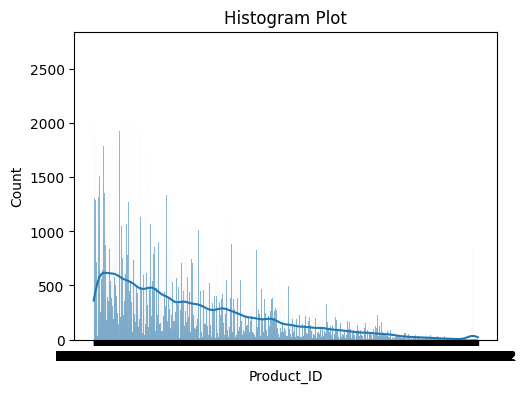

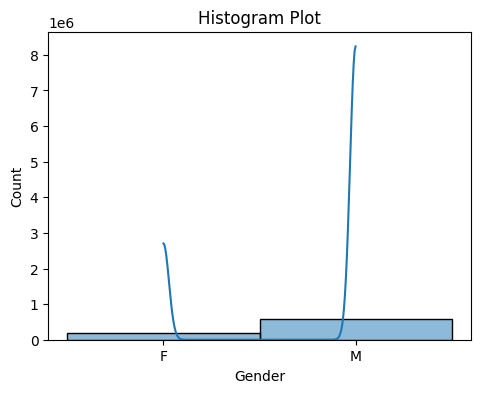

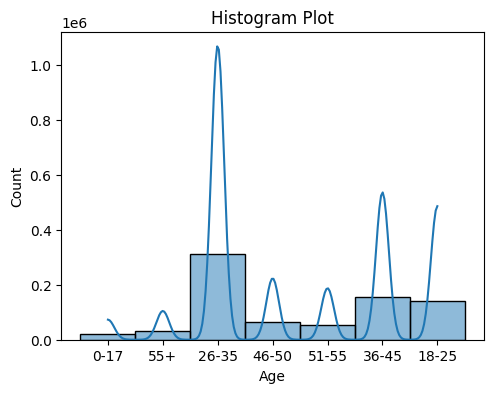

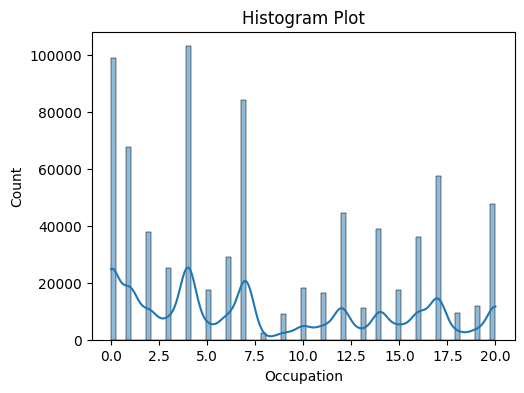

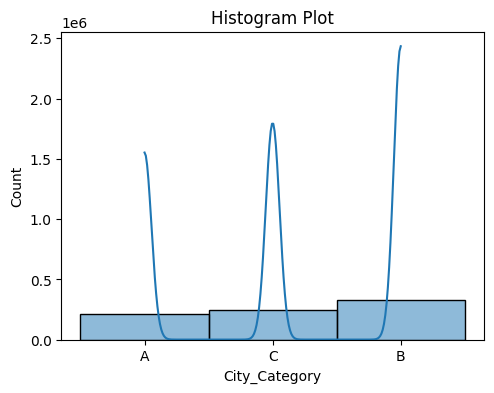

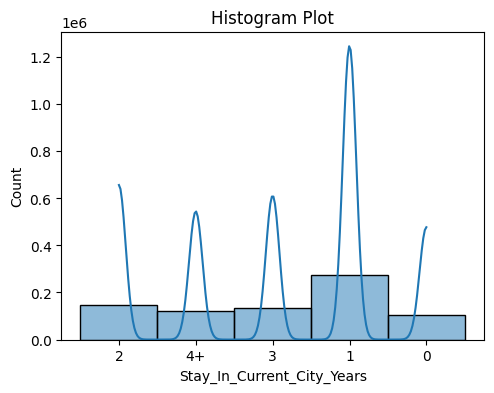

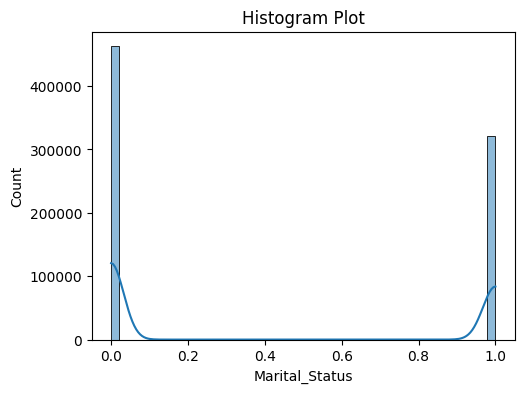

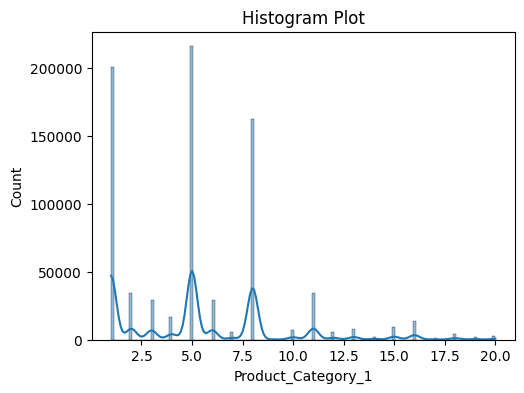

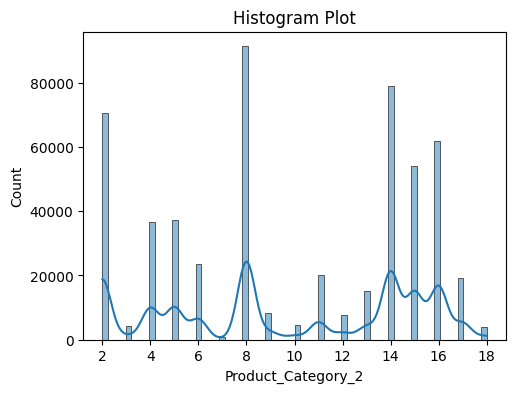

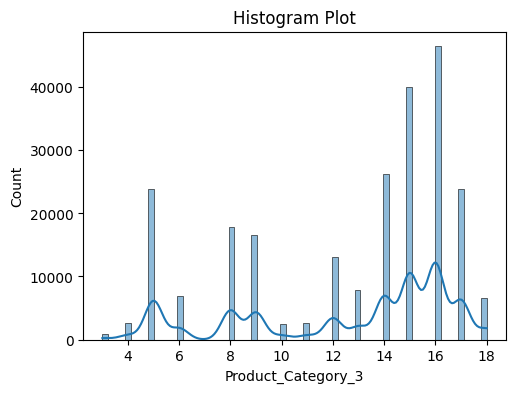

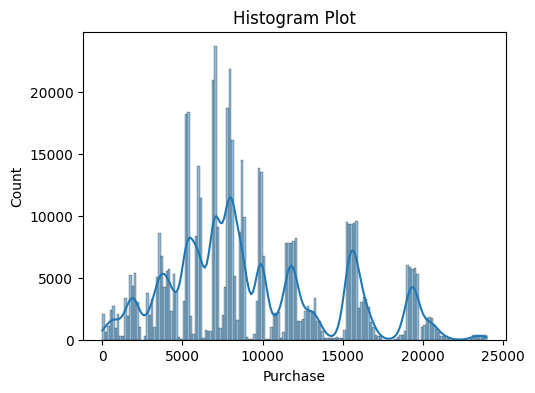

In [45]:
# Data Distribution

for col in df.columns:
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    sns.histplot(df[col], kde=True)
    plt.title("Histogram Plot")

In [46]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [47]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [48]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [49]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

#### **Observations-**
- As we can see for cat 2 there are almost 2.5 Lakh missing values out of 7.8 Lakh, so we can try random imputation (will take a lot of time) , So adding a missing category.

- For Cat 3 there are almost 5.5 Lakh missing values out of 7.8 Lakh, so we can create a new category named missing

- Purchase should have missing values as we will be testing on that data.

In [50]:
# Random Imputation for Category 2
df['Product_Category_2'] = df['Product_Category_2'].fillna(-1)

# Missing Category for Product_Category_3 (-1)
df['Product_Category_3'] = df['Product_Category_3'].fillna(-1)

In [51]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [52]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [53]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [54]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,-1.0,-1.0,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,-1.0,-1.0,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,-1.0,1057.0
4,P00285442,M,55+,16,C,4,0,8,-1.0,-1.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,F,26-35,15,B,4,1,8,-1.0,-1.0,NaN
783663,P00254642,F,26-35,15,B,4,1,5,8.0,-1.0,NaN
783664,P00031842,F,26-35,15,B,4,1,1,5.0,12.0,NaN
783665,P00124742,F,46-50,1,C,4,0,10,16.0,-1.0,NaN


#### **Observations-**
- Gender(One-Hot), Age(Ordinal), City_category(One-Hot) are Categorical values.


In [55]:
X = df.drop(['Purchase'], axis=1)
y = df['Purchase']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [57]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('Ordinal', OrdinalEncoder(categories=[['0-17','18-25','26-35','36-45','46-50','51-55','55+']]), [2]),
    ('One-Hot', OneHotEncoder(sparse_output=False, drop='first'), ['Gender','City_Category'])
], remainder='passthrough')

In [59]:
X_train_trf = trf.fit_transform(X_train)

X_test_trf = trf.transform(X_test)

In [60]:
feature_names = trf.get_feature_names_out()

# Convert to DataFrame
X_train_trf= pd.DataFrame(X_train_trf, columns=feature_names)
X_test_trf= pd.DataFrame(X_test_trf, columns=feature_names)

X_train_trf.head()

,Ordinal__Age,One-Hot__Gender_M,One-Hot__City_Category_B,One-Hot__City_Category_C,remainder__Product_ID,remainder__Occupation,remainder__Stay_In_Current_City_Years,remainder__Marital_Status,remainder__Product_Category_1,remainder__Product_Category_2,remainder__Product_Category_3
0,5.0,0.0,0.0,1.0,P00088242,0,0,1,6,10.0,13.0
1,1.0,1.0,0.0,0.0,P00003242,4,4,0,8,15.0,-1.0
2,2.0,1.0,0.0,0.0,P00133742,16,3,0,5,14.0,-1.0
3,3.0,1.0,0.0,0.0,P00083842,20,2,1,5,14.0,-1.0
4,4.0,1.0,0.0,1.0,P00071442,1,2,1,15,17.0,-1.0


In [61]:
X_test_trf.head()

,Ordinal__Age,One-Hot__Gender_M,One-Hot__City_Category_B,One-Hot__City_Category_C,remainder__Product_ID,remainder__Occupation,remainder__Stay_In_Current_City_Years,remainder__Marital_Status,remainder__Product_Category_1,remainder__Product_Category_2,remainder__Product_Category_3
0,2.0,1.0,1.0,0.0,P00235842,14,2,1,11,15.0,16.0
1,2.0,1.0,0.0,1.0,P00180442,0,1,0,11,-1.0,-1.0
2,3.0,1.0,0.0,0.0,P00105042,17,1,0,5,9.0,-1.0
3,2.0,1.0,0.0,0.0,P00201342,1,1,1,1,2.0,9.0
4,6.0,1.0,1.0,0.0,P00178442,1,4,1,5,-1.0,-1.0
